In [63]:
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [64]:
#Read the csv file as dataframe
df = pd.read_csv("E:\\Downloads\\US_Accidents_Dec21_updated.csv")

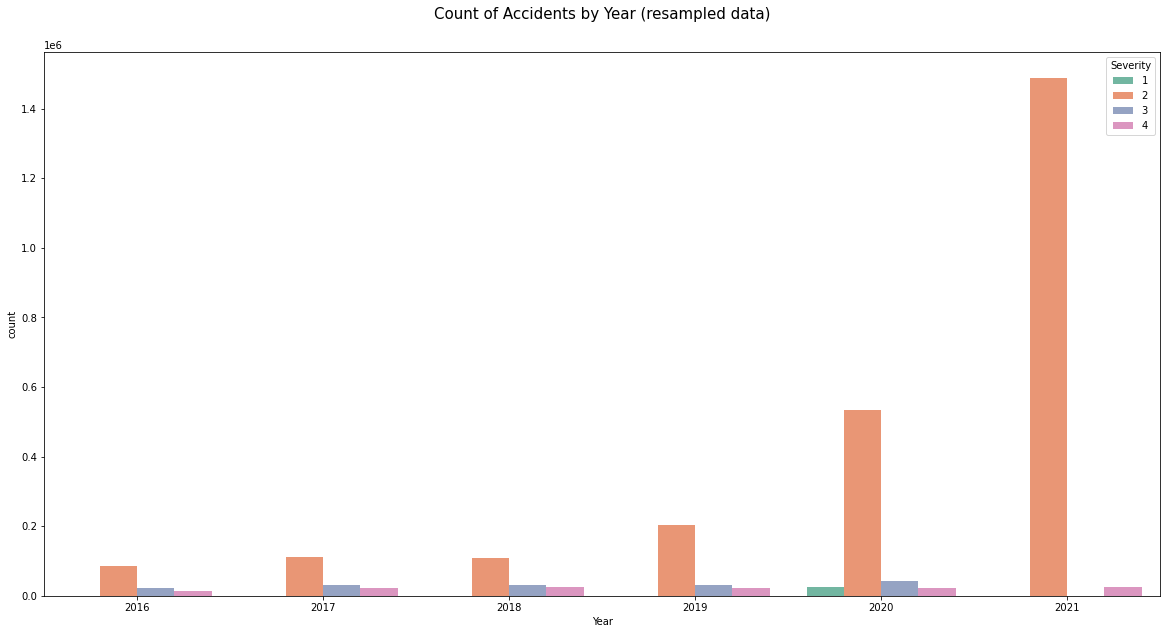

In [67]:
sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
#check the number of rows and columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

# Data Cleaning/Processing/Engineering

## Droppping unecessary columns 

In [6]:
#ID column is unique for every row and doesn't offer any useful information
#Country and Turning_Loop only have 1 unique value so it doesn't offer any useful information
#End_Lat and End_Lng are not needed because it can only be collected after the accident has already happened and therefore can't be predictors
#Number has too many missing values.
#Weather time stamp is not needed because it is collected after the incident

In [7]:
df = df.drop(['ID','Description','End_Lat','End_Lng','Country',
                  'Turning_Loop','Weather_Timestamp','Zipcode',
                 'Airport_Code','Number'], axis=1)

In [8]:
# drop na in Street
df = df.dropna(subset=['Street'])

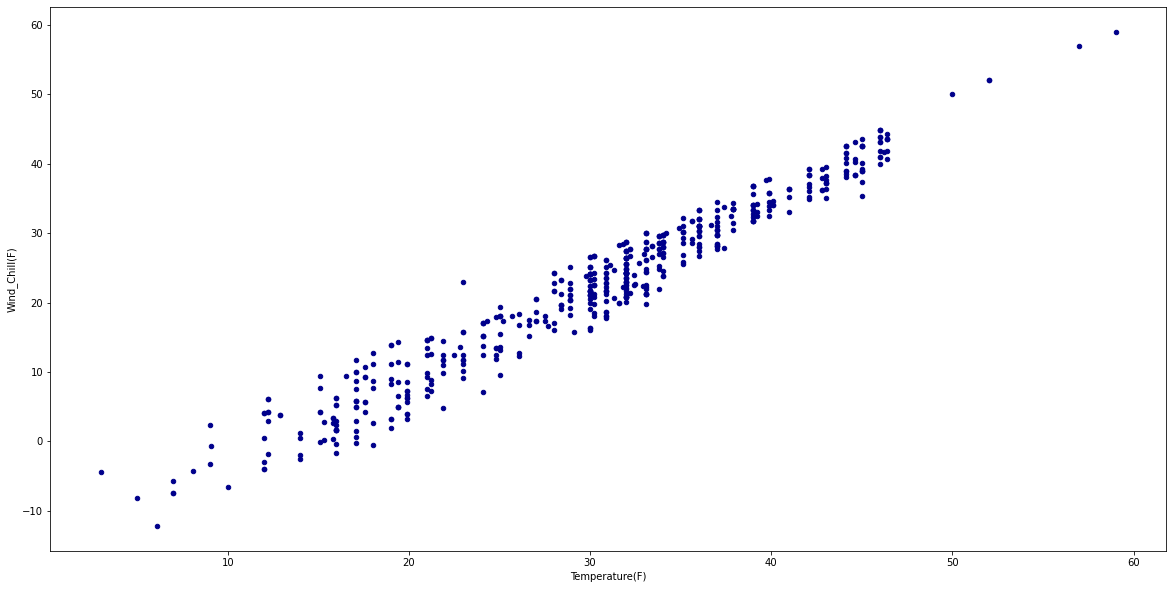

In [9]:
ax1 = df.iloc[:3000].plot.scatter(x='Temperature(F)',y='Wind_Chill(F)',c='DarkBlue')
plt.gcf().set_size_inches(20, 10)

In [10]:
df['Temperature(F)'].corr(df['Wind_Chill(F)'])

0.993856914301538

As we can see,'Wind_Chill(F)' column is highly correlated with Temperature(F) column and has too many missing values,so we can drop it

In [11]:
df = df.drop('Wind_Chill(F)', axis=1)

## Fix Datetime Format

In [66]:
df['Start_Time'] = df['Start_Time'].astype('datetime64')
df['End_Time'] = df['End_Time'].astype('datetime64')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S')
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['DayofWeek'] = df['Start_Time'].dt.dayofweek   
dayofweek_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['DayofWeek'] = df['DayofWeek'].map(dayofweek_dict)    
df['Time_Diff'] = (df['End_Time'] - df['Start_Time']).astype('timedelta64[m]')
df = df.drop(['End_Time'], axis=1)

## Clean Up Categorical Features

Wind_Direction column is not helpfull, we don't know the position or the direction of the car, we can drop it.

In [14]:
df = df.drop(['Wind_Direction'], axis=1)

In [15]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')
df.loc[:,['Weather_Condition'] + weather]

,Weather_Condition,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
0,Light Rain,False,False,True,False,False,False,False
1,Light Rain,False,False,True,False,False,False,False
2,Overcast,False,True,False,False,False,False,False
3,Overcast,False,True,False,False,False,False,False
4,Light Rain,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
2845337,Fair,False,False,False,False,False,False,False
2845338,Fair,False,False,False,False,False,False,False
2845339,Partly Cloudy,False,True,False,False,False,False,False
2845340,Fair,False,False,False,False,False,False,False


In [16]:
for col in ['Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset']:
    df[col] = df[col].astype('category')

In [17]:
Night = df[df['Sunrise_Sunset']=='Night'].groupby([df['Hour']]).count()['Severity']
Day = df[df['Sunrise_Sunset']=='Day'].groupby([df['Hour']]).count()['Severity']
day_night = pd.concat([Night, Day], axis=1)
day_night.columns= ['Night','Day']
day_night = day_night.replace(np.nan, 0)

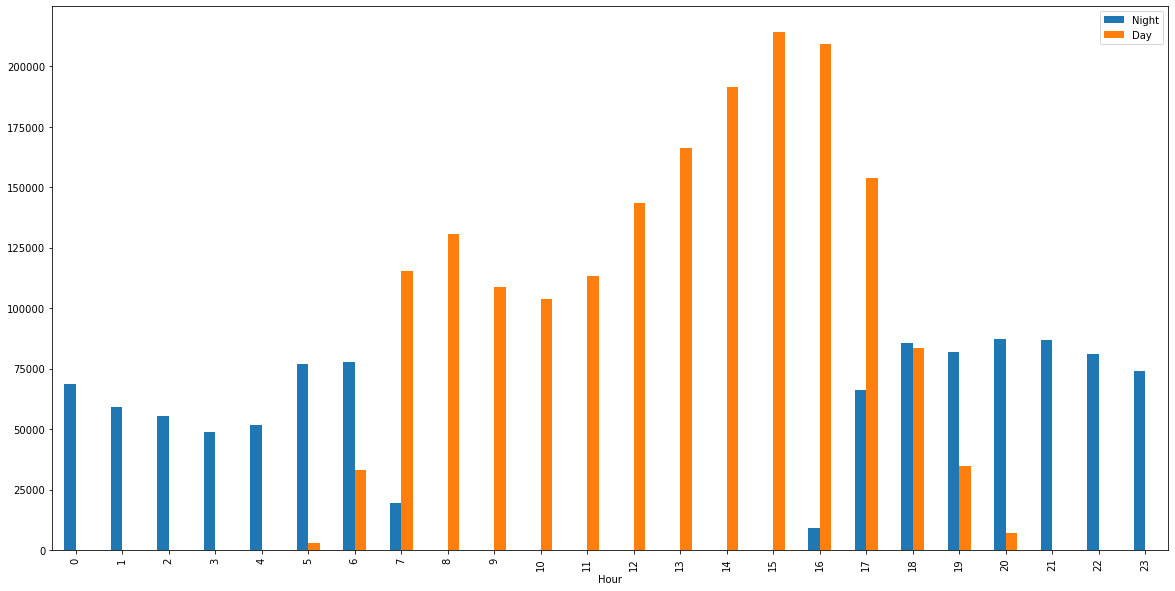

In [18]:
day_night.plot(kind="bar")
plt.xticks(rotation = 90) 
plt.gcf().set_size_inches(20, 10)

In [19]:
def fill_missing_values_Sunrise_Sunset(row):
    if pd.isna(row['Sunrise_Sunset']) :
        if row['Hour'] >= 6 and row['Hour'] < 18 :
            return 'Day'
        else :
            return 'Night'
    else:
        return row['Sunrise_Sunset']

In [20]:
df['Sunrise_Sunset'] = df.apply(lambda row : fill_missing_values_Sunrise_Sunset(row),axis=1)

In [21]:
Night = df[df['Astronomical_Twilight']=='Night'].groupby(df['Hour']).count()['Severity']
Day = df[df['Astronomical_Twilight']=='Day'].groupby([df['Hour']]).count()['Severity']
day_night = pd.concat([Night, Day], axis=1)
day_night.columns= ['Night','Day']
day_night = day_night.replace(np.nan, 0)

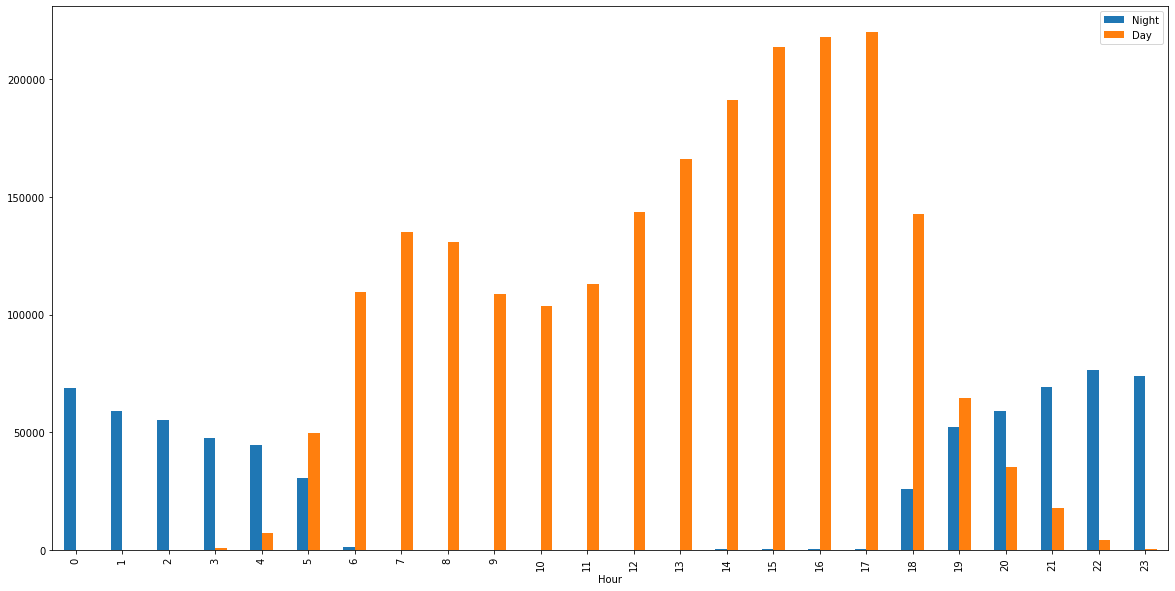

In [22]:
day_night = day_night.replace(np.nan, 0)
day_night.plot(kind="bar")
plt.xticks(rotation = 90) 
plt.gcf().set_size_inches(20, 10)

In [23]:
def fill_missing_values_Astronomical_Twilight(row):
    if pd.isna(row['Astronomical_Twilight']) :
        if row['Hour'] >= 5 and row['Hour'] < 20 :
            return 'Day'
        else :
            return 'Night'
    else:
        return row['Astronomical_Twilight']

In [24]:
df['Astronomical_Twilight'] = df.apply(lambda row : fill_missing_values_Astronomical_Twilight(row),axis=1)

In [25]:
Night = df[df['Nautical_Twilight']=='Night'].groupby([df['Hour']]).count()['Severity']
Day = df[df['Nautical_Twilight']=='Day'].groupby([df['Hour']]).count()['Severity']
day_night = pd.concat([Night, Day], axis=1)
day_night.columns= ['Night','Day']
day_night = day_night.replace(np.nan, 0)

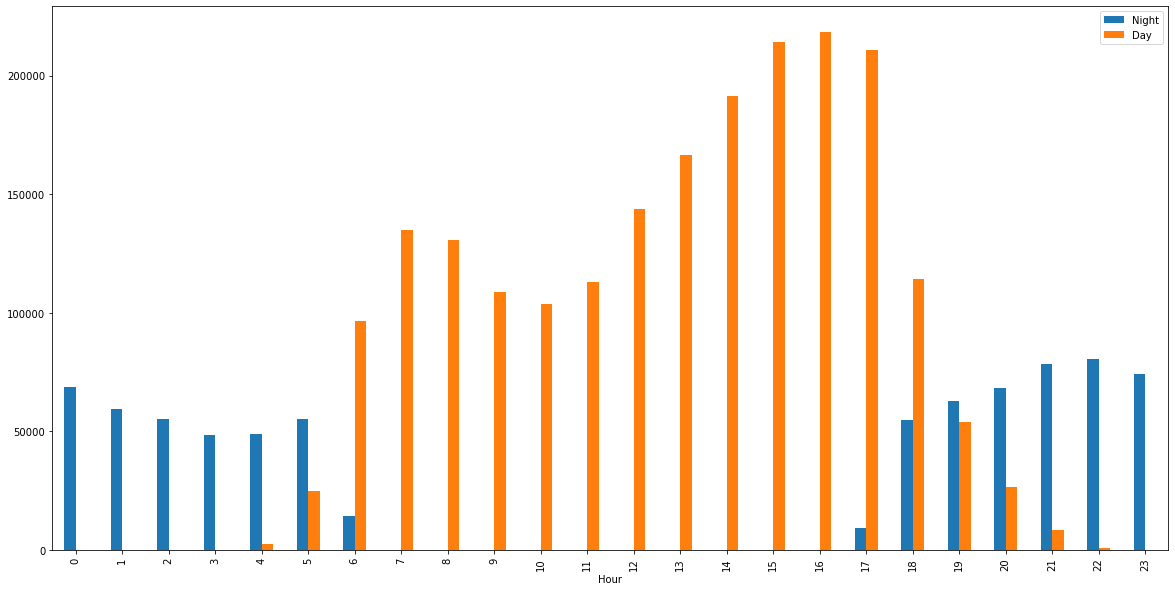

In [26]:
day_night = day_night.replace(np.nan, 0)
day_night.plot(kind="bar")
plt.xticks(rotation = 90) 
plt.gcf().set_size_inches(20, 10)

In [27]:
def fill_missing_values_Nautical_Twilight(row):
    if pd.isna(row['Nautical_Twilight']) :
        if row['Hour'] >= 6 and row['Hour'] < 19 :
            return 'Day'
        else :
            return 'Night'
    else:
        return row['Nautical_Twilight']

In [28]:
df['Nautical_Twilight'] = df.apply(lambda row : fill_missing_values_Nautical_Twilight(row),axis=1)

In [29]:
Night = df[df['Civil_Twilight']=='Night'].groupby([df['Hour']]).count()['Severity']
Day = df[df['Civil_Twilight']=='Day'].groupby([df['Hour']]).count()['Severity']
day_night = pd.concat([Night, Day], axis=1)
day_night.columns= ['Night','Day']
day_night = day_night.replace(np.nan, 0)

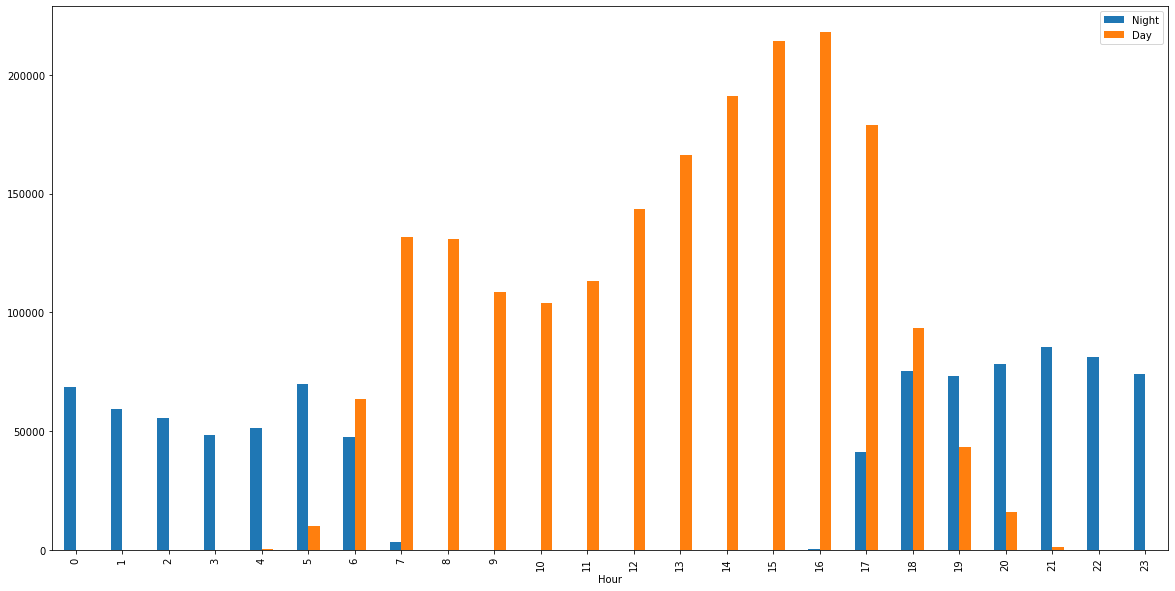

In [30]:
day_night = day_night.replace(np.nan, 0)
day_night.plot(kind="bar")
plt.xticks(rotation = 90) 
plt.gcf().set_size_inches(20, 10)

In [31]:
def fill_missing_values_Civil_Twilight(row):
    if pd.isna(row['Civil_Twilight']) :
        if row['Hour'] >= 6 and row['Hour'] < 19 :
            return 'Day'
        else :
            return 'Night'
    else:
        return row['Civil_Twilight']

In [32]:
df['Civil_Twilight'] = df.apply(lambda row : fill_missing_values_Civil_Twilight(row),axis=1)

# HANDLING THE REST OF MISSING DATA

In [33]:
#percentage of missing data
df.isnull().sum() / len(df)*100

Severity                 0.00000
Start_Time               0.00000
Start_Lat                0.00000
Start_Lng                0.00000
Distance(mi)             0.00000
Street                   0.00000
Side                     0.00000
City                     0.00481
County                   0.00000
State                    0.00000
Timezone                 0.12856
Temperature(F)           2.43461
Humidity(%)              2.56880
Pressure(in)             2.08056
Visibility(mi)           2.47932
Wind_Speed(mph)          5.55094
Precipitation(in)       19.31077
Weather_Condition        2.48248
Amenity                  0.00000
Bump                     0.00000
Crossing                 0.00000
Give_Way                 0.00000
Junction                 0.00000
No_Exit                  0.00000
Railway                  0.00000
Roundabout               0.00000
Station                  0.00000
Stop                     0.00000
Traffic_Calming          0.00000
Traffic_Signal           0.00000
Sunrise_Su

In [34]:
# group data by 'City' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['City','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 7217
Humidity(%) : 7331
Pressure(in) : 6889
Visibility(mi) : 13599
Wind_Speed(mph) : 15085
Precipitation(in) : 58046


In [35]:
df = df.dropna(subset=Weather_data)

In [36]:
#percentage of missing data
df.isnull().sum() / len(df)*100

Severity                0.00000
Start_Time              0.00000
Start_Lat               0.00000
Start_Lng               0.00000
Distance(mi)            0.00000
Street                  0.00000
Side                    0.00000
City                    0.00000
County                  0.00000
State                   0.00000
Timezone                0.09191
Temperature(F)          0.00000
Humidity(%)             0.00000
Pressure(in)            0.00000
Visibility(mi)          0.00000
Wind_Speed(mph)         0.00000
Precipitation(in)       0.00000
Weather_Condition       2.00235
Amenity                 0.00000
Bump                    0.00000
Crossing                0.00000
Give_Way                0.00000
Junction                0.00000
No_Exit                 0.00000
Railway                 0.00000
Roundabout              0.00000
Station                 0.00000
Stop                    0.00000
Traffic_Calming         0.00000
Traffic_Signal          0.00000
Sunrise_Sunset          0.00000
Civil_Tw

we can use Street column to fill missing data in Timezone column, every Street is associated with only one Timezone.

In [37]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain', nan],
      dtype=object)

In [38]:
df2 = df[['Timezone','Street']].copy()
df2.dropna(axis=0,inplace=True)
df2.drop_duplicates(subset=['Street'],inplace=True)
df2.set_index('Street',inplace=True)
df2.head()#df2 contains all unique couples of street and its associated timezone

,Timezone
Street,
Outerbelt E,US/Eastern
I-70 E,US/Eastern
I-75 S,US/Eastern
I-77 N,US/Eastern
State Route 32,US/Eastern


In [39]:
df['Timezone'] = df['Timezone'].replace(np.nan, "Not Found")

In [40]:
def fill_missing_values_Timezone(row):
    if row['Timezone']=='Not Found' and  row['Street'] in df2.index :
        return df2.loc[row['Street']]['Timezone']
    else :
        return row['Timezone']

In [41]:
df['Timezone'] = df.apply(lambda row: fill_missing_values_Timezone(row) ,axis=1)

In [42]:
df.isnull().sum()

Severity                     0
Start_Time                   0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Street                       0
Side                         0
City                         0
County                       0
State                        0
Timezone                     0
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        55662
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Sunrise_Sunset               0
Civil_Twilight               0
Nautical

In [277]:
df = df.replace([True, False], [1,0])

In [44]:
t=df[['Side','Timezone','DayofWeek','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']].copy()

In [278]:
cat = ['Side','Timezone','DayofWeek','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

In [54]:
cat = ['Side','Timezone','DayofWeek','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
pd.get_dummies(df[cat], drop_first=True)

,Side_R,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1
1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1
2,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0
3,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0
4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2845338,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2845339,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2845340,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [55]:
cat = ['Side','Timezone','DayofWeek','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
df[cat] = df[cat].astype('category')
df=pd.concat([df, pd.get_dummies(df[cat], drop_first=True)], axis=1)

In [57]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Street', 'Side', 'City', 'County', 'State', 'Timezone',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'DayofWeek',
       'Time_Diff', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow',
       'Heavy_Snow', 'Fog', 'Side_R', 'Timezone_US/Central',
       'Timezone_US/Eastern', 'Timezone_US/Mountain', 'Timezone_US/Pacific',
       'DayofWeek_Monday', 'DayofWeek_Saturday', 'DayofWeek_Sunday',
       'DayofWeek_Thursday', 'DayofWeek_Tuesday', 'DayofWeek_Wednesday',
       'Sunrise_Sunset_Night', 'Civil_Twilight_Night',
       'Nautic

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779831 entries, 0 to 2845341
Data columns (total 62 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Severity                     int64         
 1   Start_Time                   datetime64[ns]
 2   Start_Lat                    float64       
 3   Start_Lng                    float64       
 4   Distance(mi)                 float64       
 5   Street                       object        
 6   Side                         category      
 7   City                         object        
 8   County                       object        
 9   State                        object        
 10  Timezone                     category      
 11  Temperature(F)               float64       
 12  Humidity(%)                  float64       
 13  Pressure(in)                 float64       
 14  Visibility(mi)               float64       
 15  Wind_Speed(mph)              float64       
 16  

## Frequency Encoding

In [59]:
for col in ['Street','City','County','State']:
    fe = df.groupby([col]).size()/len(df)
    df.loc[:,col + '_freq'] = df[col].map(fe)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779831 entries, 0 to 2845341
Data columns (total 66 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Severity                     int64         
 1   Start_Time                   datetime64[ns]
 2   Start_Lat                    float64       
 3   Start_Lng                    float64       
 4   Distance(mi)                 float64       
 5   Street                       object        
 6   Side                         category      
 7   City                         object        
 8   County                       object        
 9   State                        object        
 10  Timezone                     category      
 11  Temperature(F)               float64       
 12  Humidity(%)                  float64       
 13  Pressure(in)                 float64       
 14  Visibility(mi)               float64       
 15  Wind_Speed(mph)              float64       
 16  

In [62]:
df.to_csv('data_processed.csv', index=False)